In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generator import make_classification

[[-3.45311354 -3.71943788 -1.61896266 ...  0.62836011 -0.59346361
  -1.        ]
 [-1.66413047  0.33128591 -2.72411553 ...  4.8408505   1.93887638
  -1.        ]
 [-0.70190738 -0.96314103 -3.97203971 ... -0.14920788 -3.76606695
   1.        ]
 [ 1.89063797 -4.38232456  2.32180777 ...  1.86750721 -3.80881791
   1.        ]
 [ 1.95454917 -1.71919468 -4.06561653 ... -0.3998978   4.9201475
   1.        ]]
(5000, 501)
Distance for threshold 1.0000000000000002


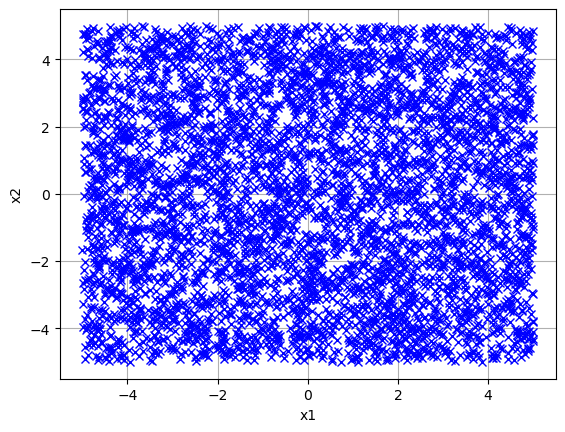

In [7]:
d = 500
u = 5
n = 5000

data_points, normal_vector = make_classification(d=d, n=n, u=u, threshold=0.001, random_state=None)
print(data_points[:5])
print(data_points.shape)
print(f'Distance for threshold {1 / np.linalg.norm(normal_vector)}')

# plotting line and data points
x1_vals = np.linspace(-u, u, 100)
# solving for x2 values x2 = (-a1 / a2) * x1
x2_vals = - (normal_vector[0] / normal_vector[1]) * x1_vals

plt.plot(data_points[:, 0], data_points[:, 1], 'xb')
# plt.plot(x1_vals, x2_vals, '-b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [ ]:
# plotting line and data points
x1_vals = np.linspace(-u, u, 100)
# solving for x2 values x2 = (-a1 / a2) * x1
x2_vals = - (normal_vector[0] / normal_vector[1]) * x1_vals

plt.plot(data_points[:, 0], data_points[:, 1], 'xg')
plt.plot(x1_vals, x2_vals, '-b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

TypeError: linspace() got an unexpected keyword argument 'random_state'

## Generating CSV files

In [5]:
ds = [10, 50, 100, 500, 1000]
ns = [500, 1_000, 5_000, 10_000, 100_000]
u = 5

for d, n in zip(ds, ns):
    data, _ = make_classification(d=d, n=n, u=u)
    # np.savetxt(f"data_d{d}_n{n}.csv", data, delimiter=",")

In [10]:
d = 500
n = 1000
u = 2
data, _ = make_classification(d, n, u, random_state=None)
np.savetxt(f"data_d{d}_n{n}_u{u}.csv", data, delimiter=",")
data = np.loadtxt(fname=f"./data_d{d}_n{n}_u{u}.csv", delimiter=",")
data[:5]

array([[ 1.7096256 , -0.52794174,  0.60536307, ..., -1.46327303,
         1.49429917, -1.        ],
       [ 0.25186455, -1.27200658,  1.54640687, ..., -0.463778  ,
         1.39698597, -1.        ],
       [-1.24477665,  1.55269848, -1.38305196, ...,  0.77736521,
         1.98595806, -1.        ],
       [-1.00728541,  0.6870734 , -1.13440061, ..., -1.00872973,
        -1.08923477,  1.        ],
       [ 1.95515032,  0.355309  ,  1.36801893, ..., -0.32390492,
        -0.1321677 ,  1.        ]])

In [3]:
ds = [10, 50, 100, 500, 1000]
ns = [500, 1_000, 5_000, 10_000, 100_000]
u = 5

for d in ds:
    for n in ns:
        data = make_classification(d, n, u, random_state=None, debug=True)
        np.savetxt(f"./data/data_d{d}_n{n}_u{u}.csv", data, delimiter=",")
        data = np.loadtxt(fname=f"./data/data_d{d}_n{n}_u{u}.csv", delimiter=",")
        

Generating data for d=10, n=500, u=5
Num needed: 500
Num needed: 33
Num needed: 1
Generating data for d=10, n=1000, u=5
Num needed: 1000
Num needed: 53
Num needed: 7
Generating data for d=10, n=5000, u=5
Num needed: 5000
Num needed: 364
Num needed: 27
Generating data for d=10, n=10000, u=5
Num needed: 10000
Num needed: 748
Num needed: 54
Num needed: 2
Generating data for d=10, n=100000, u=5
Num needed: 100000
Num needed: 8675
Num needed: 728
Num needed: 64
Num needed: 6
Num needed: 2
Num needed: 1
Generating data for d=50, n=500, u=5
Num needed: 500
Num needed: 12
Generating data for d=50, n=1000, u=5
Num needed: 1000
Num needed: 37
Num needed: 2
Generating data for d=50, n=5000, u=5
Num needed: 5000
Num needed: 176
Num needed: 11
Generating data for d=50, n=10000, u=5
Num needed: 10000
Num needed: 394
Num needed: 16
Generating data for d=50, n=100000, u=5
Num needed: 100000
Num needed: 3776
Num needed: 123
Num needed: 6
Num needed: 1
Generating data for d=100, n=500, u=5
Num needed: 5

## Task 4

In [ ]:
# generating data to show how each model scales with n = 500 and d increasing
ds = [10, 100, 500]
n = 500
u = 5

for d in ds:
    data = make_classification(d, n, u, random_state=1, debug=True)
    np.savetxt(f"./data/data_d{d}_n{n}_u{u}.csv", data, delimiter=",")


Generating data for d=10, n=500, u=5
Num needed: 500
Num needed: 69
Num needed: 11
Num needed: 3
Generating data for d=100, n=500, u=5
Num needed: 500
Num needed: 16
Num needed: 1
Generating data for d=500, n=500, u=5
Num needed: 500
Num needed: 4


In [2]:
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# generating data to show how each model scales with d = 500 or 1000 and n increasing
ds = [10, 50, 100, 500]
ns = [500, 1000, 5000, 10_000]
u = 5

def mean_time_costs(primal_model, dual_model, X_train, y_train):
    primal_time_costs = []
    dual_time_costs = []
    max_iter = 5

    for _ in range(max_iter):
        # training each model and timing the training time
        start = time.time()
        primal_model.fit(X_train, y_train)
        end = time.time()
        primal_time_cost = end - start
        primal_time_costs.append(primal_time_cost)

        start = time.time()
        dual_model.fit(X_train, y_train)
        end = time.time()
        dual_time_cost = end - start
        dual_time_costs.append(dual_time_cost)

    return (sum(primal_time_costs) / max_iter, sum(dual_time_costs) / max_iter)

# define the models
random_state = 1
max_iters = 5_000_000
primal_model = LinearSVC(
    random_state=random_state,
    dual=False,
    max_iter=max_iters
)

dual_model = LinearSVC(
    random_state=random_state,
    dual=True,
    max_iter=max_iters
)

test_size = 0.3
table = []

for d in ds:
    for n in ns:
        if d > n:
            continue
        print(f'd={d}, n={n}')
        data = make_classification(d, n, u)
        X = data[:, :-1]
        y = data[:, -1]
        d = X.shape[1]
        n = X.shape[0]

        X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size=test_size, random_state=random_state)
        primal_time_cost, dual_time_cost = mean_time_costs(primal_model, dual_model, X_train, y_train)
        
        # making predictions and calculating the accuracy for each model
        primal_predictions = primal_model.predict(X_test)
        primal_accuracy = np.mean(primal_predictions == y_test) * 100

        dual_predictions = dual_model.predict(X_test)
        dual_accuracy = np.mean(dual_predictions == y_test) * 100

        table.append([d, n, primal_time_cost, dual_time_cost,
                    primal_accuracy, dual_accuracy])

d=10, n=500
d=10, n=1000
d=10, n=5000
d=10, n=10000
d=50, n=500
d=50, n=1000
d=50, n=5000
d=50, n=10000
d=100, n=500
d=100, n=1000
d=100, n=5000
d=100, n=10000
d=500, n=500
d=500, n=1000
d=500, n=5000
d=500, n=10000


In [3]:
# sort the table
table = sorted(table, key=lambda x: (x[0], x[1]))

# printing out the data as a table (formatted to be copied and pasted into OverLeaf)
for row in table:
    print(
        f'{row[0]} & {row[1]} & {row[2]:<.3f} & {row[3]:<.3f} & {row[4]:<.2f} & {row[5]:<.2f} \\\\')

10 & 500 & 0.001 & 0.001 & 100.00 & 100.00 \\
10 & 1000 & 0.001 & 0.002 & 100.00 & 100.00 \\
10 & 5000 & 0.003 & 0.004 & 100.00 & 100.00 \\
10 & 10000 & 0.005 & 0.008 & 100.00 & 100.00 \\
50 & 500 & 0.004 & 0.020 & 96.67 & 96.67 \\
50 & 1000 & 0.004 & 0.049 & 98.00 & 98.00 \\
50 & 5000 & 0.011 & 0.066 & 100.00 & 100.00 \\
50 & 10000 & 0.026 & 0.110 & 100.00 & 100.00 \\
100 & 500 & 0.022 & 0.028 & 87.33 & 86.67 \\
100 & 1000 & 0.014 & 0.203 & 93.33 & 92.67 \\
100 & 5000 & 0.019 & 0.303 & 99.73 & 99.73 \\
100 & 10000 & 0.035 & 0.292 & 100.00 & 100.00 \\
500 & 500 & 0.261 & 0.011 & 69.33 & 72.00 \\
500 & 1000 & 1.226 & 0.057 & 76.67 & 76.00 \\
500 & 5000 & 0.428 & 7.381 & 95.00 & 94.33 \\
500 & 10000 & 1.618 & 24.457 & 97.23 & 97.23 \\
